# 📊 Diagnóstico Visual com `diagPlotter`
Este notebook mostra como utilizar o pacote `readDiag` para visualizar arquivos diagnósticos do GSI, tanto para dados convencionais quanto de radiância.

In [5]:
%matplotlib inline
from readDiag import diagAccess, diagPlotter
from pathlib import Path


## 🔍 Definição de arquivos de teste

In [8]:
conv_file = Path("../data/diag_conv_01.2020010100")
rad_file = Path("../data/diag_amsua_n15_01.2020010100")


## 📘 Dados Convencionais: Histogramas e Boxplots

2025-07-22 16:10:14,621 readDiag.reader INFO Initializing diagAccess: file=../data/diag_conv_01.2020010100, var=None, use_memmap=False
2025-07-22 16:10:14,624 readDiag.reader INFO Reading conventional diagnostics from ../data/diag_conv_01.2020010100
/media/extra/wrk/dev/newReadDiag/src/readDiag/reader.py:325: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dt = np.dtype([
2025-07-22 16:10:15,184 readDiag.reader INFO _readConv completed in 0.561s


<Axes: title={'center': 'Boxplot of omf for ps across channels'}, xlabel='Channel', ylabel='omf'>

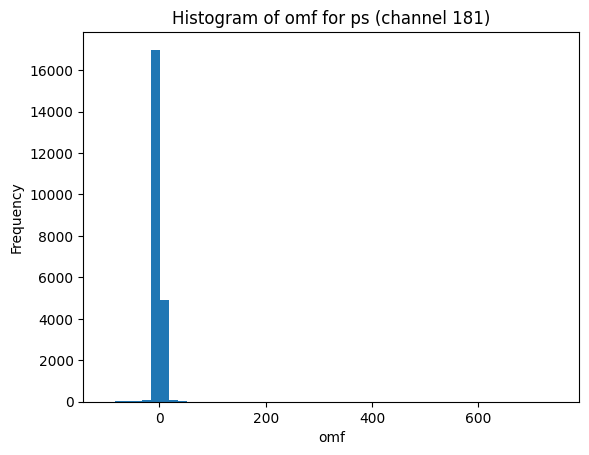

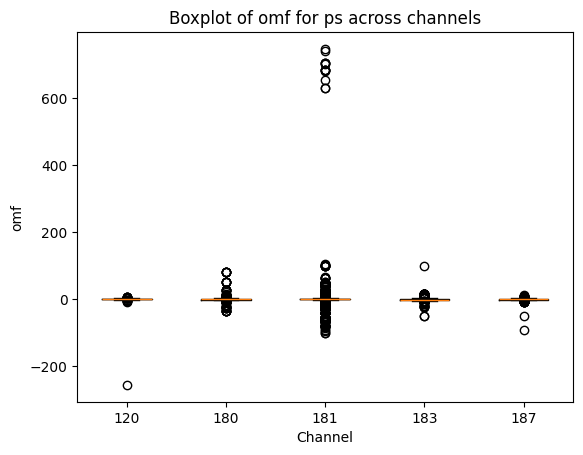

In [9]:
da_conv = diagAccess(conv_file)
dp_conv = diagPlotter(da_conv)

# Variável e canal
df_dict = da_conv.get_data_frame()
var = next(iter(df_dict.keys()))
chan = next(iter(df_dict[var].keys()))

dp_conv.plot_hist_conv(var, chan, col="omf")
dp_conv.plot_boxplot_channels_conv(var, col="omf")


## 📗 Dados de Radiância: Estatísticas e Distribuições

2025-07-22 16:10:29,956 readDiag.reader INFO Initializing diagAccess: file=../data/diag_amsua_n15_01.2020010100, var=None, use_memmap=False
2025-07-22 16:10:29,959 readDiag.reader INFO Reading radiance diagnostics from ../data/diag_amsua_n15_01.2020010100 (memmap=False)
2025-07-22 16:10:29,978 readDiag.reader INFO _readRad completed in 0.019s


TypeError: diagPlotter.plot_omf_distribution_rad() got an unexpected keyword argument 'chan_idx'

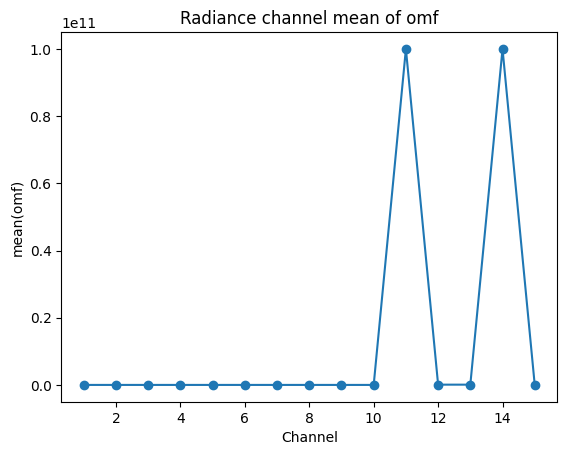

In [10]:
da_rad = diagAccess(rad_file)
dp_rad = diagPlotter(da_rad)

# Estatísticas por canal
dp_rad.plot_channel_stats_rad(metric="omf", agg="mean")

# Distribuição O-F para canal 0 e 5
dp_rad.plot_omf_distribution_rad(chan_idx=0, corrected=False)
dp_rad.plot_omf_distribution_rad(chan_idx=5, corrected=True)
